# Premissa de análise

Dentro do contesto de Experiência do Consumidor (CX) vamos tentar entender o que faz com que os clientes não recomendem os produtos. A partir dessa análise, podemos realizar ações para tentar melhorar a experiência do cliente, aumentando vendas e retenção.

## Loading the libs & data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

In [3]:
df = pd.read_csv('private_company_product_review_dataset.csv')
df.head(3)

,Unnamed: 0,review_id,review_datetime,product_id,product_name,product_brand_name,product_category_l1,product_category_l2,review_comment_title,review_comment_text,review_rate,review_recommend_to_a_friend,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_brazilian_state
0,0,00003a66-56db-4974-a70c-54506b7900e3,2021-05-10T10:00:01Z,113784,Kit 3 Em 1 Descascador Cortador Modelador Frut...,NaN,Beleza e Perfumaria,Cabelo,Gostei muito do produto .,Entrega super rápida . Parabéns pela agilida...,5,Yes,6c3872c4-031f-40b3-a652-8566b36b01d4,1952.0,M,Rio de Janeiro
1,1,00005dc4-7f7c-42bb-93bb-9c22981c1288,2021-04-20T05:57:09Z,101682,Relógio Casio G-Shock Masculino DW-9052GBX-1A9DR,NaN,Relógios,Relógios de Pulso,Não entregue,O produto não foi entregue e após um mês da co...,1,No,b9f99932-a41f-47f3-b002-4546e07b35dd,1992.0,F,Paraná
2,2,000120f1-1b5d-4c4b-b082-9299c092d648,2021-05-14T17:08:03Z,116516,Relógio Casio Feminino Ltp-V002gl-9budf,NaN,Relógios,Relógios,O Relógio não funciona,A minha esposa foi acerta o relógio e não func...,1,No,9f6d9901-fb0f-4aeb-a068-a0888cb1f724,1956.0,M,Distrito Federal


### Feature engineering

In [4]:
# Remove unnamed column
df = df.drop('Unnamed: 0', axis=1)

# remove reviews from June onwars
df['review_datetime'] = pd.to_datetime(df['review_datetime'], utc=True)
cutoff_date = datetime(2021, 6, 1, tzinfo=pytz.UTC)
df_filtered = df[df['review_datetime'] < cutoff_date]

# Remove null values from 'review_recommend_to_a_friend'
df_filtered = df_filtered.dropna(subset=['review_recommend_to_a_friend'])

# Convert 'Yes' and 'No' to 1 and 0
df_filtered['recommend'] = df_filtered['review_recommend_to_a_friend'].map({'Yes': 1, 'No': 0})

df_filtered.head(3)

,review_id,review_datetime,product_id,product_name,product_brand_name,product_category_l1,product_category_l2,review_comment_title,review_comment_text,review_rate,review_recommend_to_a_friend,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_brazilian_state,recommend
0,00003a66-56db-4974-a70c-54506b7900e3,2021-05-10 10:00:01+00:00,113784,Kit 3 Em 1 Descascador Cortador Modelador Frut...,NaN,Beleza e Perfumaria,Cabelo,Gostei muito do produto .,Entrega super rápida . Parabéns pela agilida...,5,Yes,6c3872c4-031f-40b3-a652-8566b36b01d4,1952.0,M,Rio de Janeiro,1
1,00005dc4-7f7c-42bb-93bb-9c22981c1288,2021-04-20 05:57:09+00:00,101682,Relógio Casio G-Shock Masculino DW-9052GBX-1A9DR,NaN,Relógios,Relógios de Pulso,Não entregue,O produto não foi entregue e após um mês da co...,1,No,b9f99932-a41f-47f3-b002-4546e07b35dd,1992.0,F,Paraná,0
2,000120f1-1b5d-4c4b-b082-9299c092d648,2021-05-14 17:08:03+00:00,116516,Relógio Casio Feminino Ltp-V002gl-9budf,NaN,Relógios,Relógios,O Relógio não funciona,A minha esposa foi acerta o relógio e não func...,1,No,9f6d9901-fb0f-4aeb-a068-a0888cb1f724,1956.0,M,Distrito Federal,0


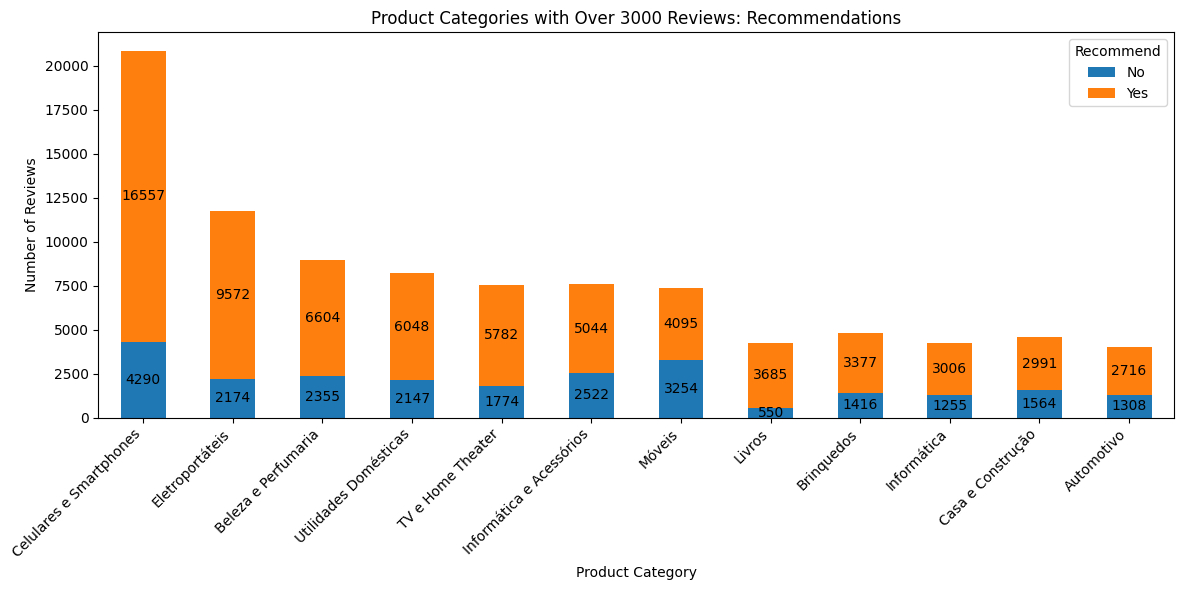

Total number of reviews in these categories: 94086
Overall recommendation rate: 73.84%

Recommendation rate by category:
Celulares e Smartphones: 79.42%
Eletroportáteis: 81.49%
Beleza e Perfumaria: 73.71%
Utilidades Domésticas: 73.80%
TV e Home Theater: 76.52%
Informática e Acessórios: 66.67%
Móveis: 55.72%
Livros: 87.01%
Brinquedos: 70.46%
Informática: 70.55%
Casa e Construção: 65.66%
Automotivo: 67.50%


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by product_category_l1 and count the reviews
category_counts = df_filtered['product_category_l1'].value_counts()

# Filter categories with more than 3000 reviews
categories_over_4000 = category_counts[category_counts > 4000].index

# Filter the dataframe to include only these categories
df_plot = df_filtered[df_filtered['product_category_l1'].isin(categories_over_4000)]

# Group by product_category_l1 and recommend, then count
grouped = df_plot.groupby(['product_category_l1', 'recommend']).size().unstack()

# Sort the data by total reviews (descending)
grouped = grouped.sort_values(by=[1, 0], ascending=False)

# Create the stacked bar plot
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Product Categories with Over 3000 Reviews: Recommendations')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Recommend', labels=['No', 'Yes'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics
total_reviews = grouped.sum().sum()
recommend_rate = (grouped[1].sum() / total_reviews) * 100

print(f"Total number of reviews in these categories: {total_reviews}")
print(f"Overall recommendation rate: {recommend_rate:.2f}%")
print("\nRecommendation rate by category:")
for category in grouped.index:
    category_total = grouped.loc[category].sum()
    category_recommend_rate = (grouped.loc[category, 1] / category_total) * 100
    print(f"{category}: {category_recommend_rate:.2f}%")

## Text analysis

In [6]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import spacy
import re

### TF-IDF | Wordcloud

In [7]:


# Download necessary NLTK data
nltk.download('stopwords')

# Load Portuguese language model
nlp = spacy.load('pt_core_news_sm')

# Download necessary NLTK data
nltk.download('stopwords')

# Get Portuguese stop words
stop_words = set(stopwords.words('portuguese'))

# Add custom stop words if needed
custom_stop_words = {'produto', 'de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem'}
stop_words.update(custom_stop_words)

def preprocess(text):
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize (split into words)
    tokens = text.split()
    # Remove stop words
    return [word for word in tokens if word not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavosarti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavosarti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


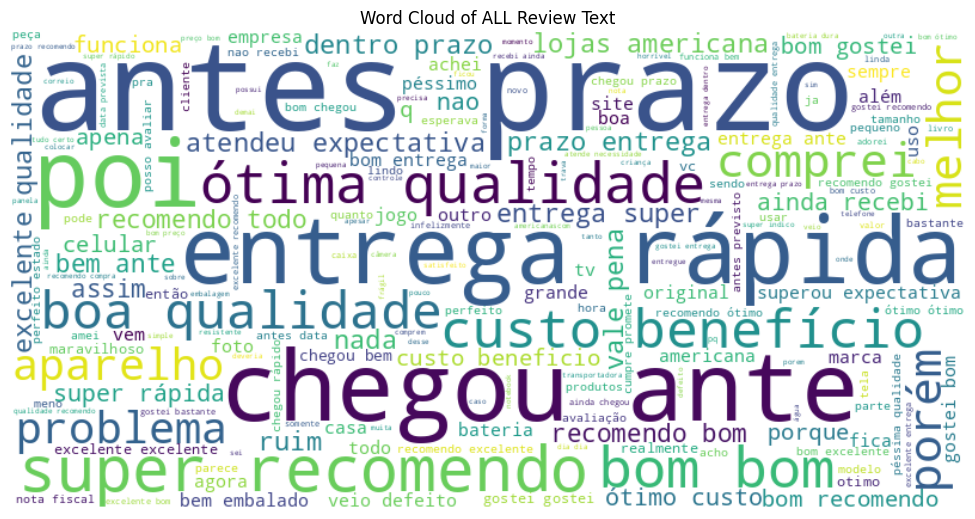

In [8]:
# Combine title and text, and preprocess
df_filtered['combined_text'] = df_filtered['review_comment_title'] + ' ' + df_filtered['review_comment_text']
df_filtered['combined_text'] = df_filtered['combined_text'].fillna('')

df_filtered['processed_text'] = df_filtered['combined_text'].apply(preprocess)

# Get word frequencies
all_words = [word for words in df_filtered['processed_text'] for word in words]
word_freq = Counter(all_words)

# Join all words into a single string for WordCloud
text_for_wordcloud = ' '.join(all_words)

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of ALL Review Text')
plt.tight_layout(pad=0)
plt.show()

# # Print top words and their frequencies
# top_words = word_freq.most_common(20)
# print("Top 20 most common words and their frequencies:")
# for word, count in top_words:
#     print(f"{word}: {count}")

/var/folders/78/wfznbsjs5qx4dz0yv13kph5m0000gn/T/ipykernel_13321/480273370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_recommended['combined_text'] = df_not_recommended['review_comment_title'] + ' ' + df_not_recommended['review_comment_text']
/var/folders/78/wfznbsjs5qx4dz0yv13kph5m0000gn/T/ipykernel_13321/480273370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_recommended['combined_text'] = df_not_recommended['combined_text'].fillna('')
/var/folders/78/wfznbsjs5qx4dz0yv13kph5m00

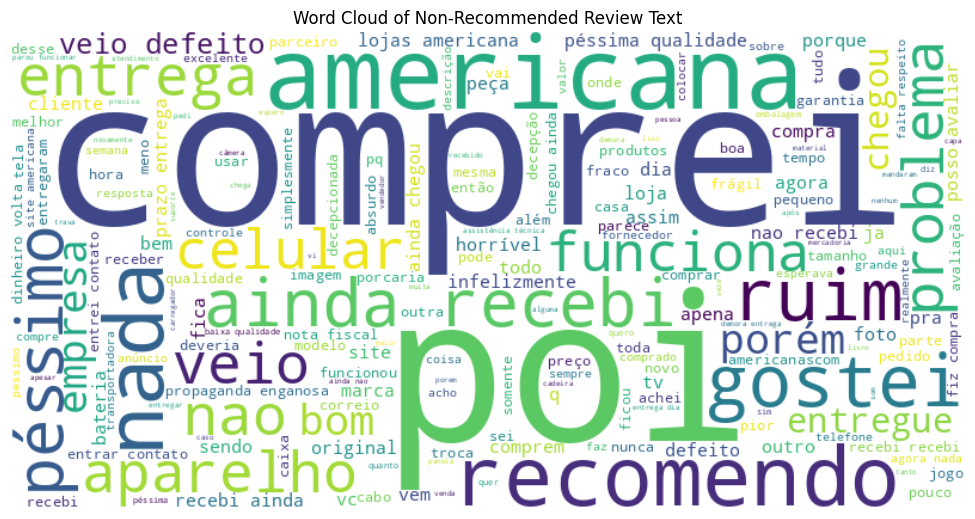

In [9]:
# Filter for non-recommended reviews
df_not_recommended = df_filtered[df_filtered['recommend'] == 0]

# Combine title and text, and preprocess
df_not_recommended['combined_text'] = df_not_recommended['review_comment_title'] + ' ' + df_not_recommended['review_comment_text']
df_not_recommended['combined_text'] = df_not_recommended['combined_text'].fillna('')

df_not_recommended['processed_text'] = df_not_recommended['combined_text'].apply(preprocess)

# Get word frequencies
all_words = [word for words in df_not_recommended['processed_text'] for word in words]
word_freq = Counter(all_words)

# Join all words into a single string for WordCloud
text_for_wordcloud = ' '.join(all_words)

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Non-Recommended Review Text')
plt.tight_layout(pad=0)
plt.show()


## Topic modeling

In [10]:
def preprocess(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize and lemmatize
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop and len(token) > 3]
    
    return ' '.join(lemmas)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    print()
    

def compute_perplexity_values(doc_term_matrix, max_topics, step=5):
    perplexity_values = []
    for num_topics in range(2, max_topics + 1, step):
        lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
        lda.fit(doc_term_matrix)
        perplexity_values.append(lda.perplexity(doc_term_matrix))
    return perplexity_values

In [11]:
# Apply preprocessing to the combined text
df_not_recommended['processed_text'] = df_not_recommended['combined_text'].apply(preprocess)

# Create CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=list(stop_words))

# Create document-term matrix
doc_term_matrix = vectorizer.fit_transform(df_not_recommended['processed_text'])

/var/folders/78/wfznbsjs5qx4dz0yv13kph5m0000gn/T/ipykernel_13321/2171975316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_recommended['processed_text'] = df_not_recommended['combined_text'].apply(preprocess)


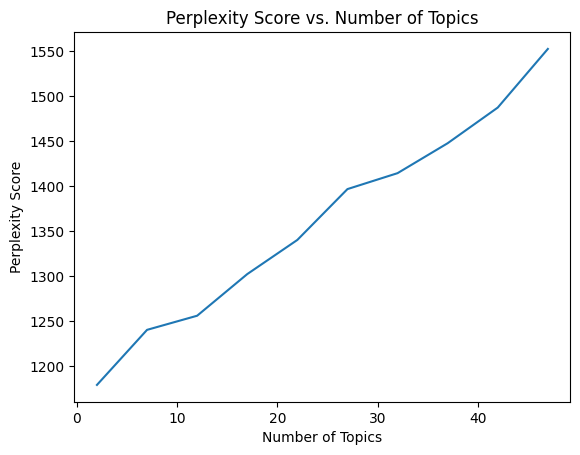

Optimal number of topics: 2


In [12]:
max_topics = 50
step = 5
perplexity_values = compute_perplexity_values(doc_term_matrix, max_topics, step)

# Plot perplexity scores
plt.plot(range(2, max_topics + 1, step), perplexity_values)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.title("Perplexity Score vs. Number of Topics")
plt.show()

# Find the number of topics with the lowest perplexity
optimal_num_topics = range(2, max_topics + 1, step)[perplexity_values.index(min(perplexity_values))]
print(f"Optimal number of topics: {optimal_num_topics}")

In [13]:
# Train the final LDA model
lda = LatentDirichletAllocation(n_components=optimal_num_topics, random_state=42)
lda.fit(doc_term_matrix)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Print top words for each topic
print_top_words(lda, feature_names, n_top_words=10)

Topic 1: vir, funcionar, qualidade, defeito, gostar, péssimo, ficar, ruim, recomendar, comprei
Topic 2: recebi, chegar, entregar, entrega, americana, loja, comprei, compra, dia, prazo



Usando o modelo LDA, temos que os 2 principais tópicos com menores perplexidade estão 
relacionados à (1) baixa qualidade de produtos e (2) demora na entrega. Com isso pode ser 
interessante mapear os produtos e os parceiros para melhorar essas áreas.

Vamos noss focar aqui em entender os problemas com o processo de entrega dos produtos.

## Classify reviews on bad delivery

Vamos criar um classificador usando modelos que permitam fazer a classificação semantica dos comentários.

Para isso vamos começar com uma classificação mais simples baseada em palavras-chave.

In [14]:
def is_delivery_related(text):
    delivery_keywords = set(['recebi', 'chegar', 'entregar', 'entrega', 'prazo', 'demora', 'atraso'])
    words = set(text.lower().split())
    return len(words.intersection(delivery_keywords)) > 0

df_not_recommended['is_delivery_issue'] = df_not_recommended['combined_text'].apply(is_delivery_related)

# Count of delivery-related issues
delivery_issues_count = df_not_recommended['is_delivery_issue'].sum()
total_reviews = len(df_not_recommended)

print(f"Number of reviews mentioning delivery issues: {delivery_issues_count}")
print(f"Percentage of reviews mentioning delivery issues: {delivery_issues_count/total_reviews*100:.2f}%")

# Display some examples of delivery-related reviews
print("\nSample delivery-related reviews:")
print(df_not_recommended[df_not_recommended['is_delivery_issue']]['combined_text'].head())

Number of reviews mentioning delivery issues: 10907
Percentage of reviews mentioning delivery issues: 29.75%

Sample delivery-related reviews:
17    Para a faixa de preço, é uma boa compra. Ponto...
26    Ainda não recebi o produto Estou aguardando o ...
46    NÃO PRESTA Comprei esse tablet para minha afil...
57    não recebi o produto boa tarde,  não recebi o ...
60    Produto ainda não chegou!!! Até hoje não receb...
Name: combined_text, dtype: object


/var/folders/78/wfznbsjs5qx4dz0yv13kph5m0000gn/T/ipykernel_13321/1989533122.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_recommended['is_delivery_issue'] = df_not_recommended['combined_text'].apply(is_delivery_related)


Agora vamos usar Sentence Transformres para criar um classificador mais sofisticado.

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np


/Users/gustavosarti/Documents/code/Hotmart/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

In [17]:
# Assuming df_not_recommended is your DataFrame with non-recommended reviews
texts = df_not_recommended['combined_text'].tolist()
labels = df_not_recommended['is_delivery_issue'].tolist()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [18]:
X_train_encoded = model.encode(X_train)
X_test_encoded = model.encode(X_test)

clf = LogisticRegression(random_state=42)
clf.fit(X_train_encoded, y_train)

LogisticRegression(random_state=42)

In [19]:
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.93      0.90      5111
        True       0.81      0.70      0.75      2223

    accuracy                           0.86      7334
   macro avg       0.84      0.81      0.82      7334
weighted avg       0.85      0.86      0.85      7334



In [20]:
def classify_delivery_issue(text):
    encoded_text = model.encode([text])
    prediction = clf.predict(encoded_text)
    probability = clf.predict_proba(encoded_text)[0][1]  # Probability of positive class
    return prediction[0], probability

# Example usage
new_review = "O produto demorou muito para chegar, péssimo prazo de entrega."
is_delivery_issue, probability = classify_delivery_issue(new_review)
print(f"Is this review about delivery issues? {is_delivery_issue}")
print(f"Probability: {probability:.2f}")

Is this review about delivery issues? True
Probability: 0.97


### Vamos tentar melhorar os modelos para melhores resultados

Para isso vamos otimizar os hiperparâmetros da Regressão Logística.

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_encoded, y_train)

print("Best parameters:", grid_search.best_params_)
clf = grid_search.best_estimator_

/Users/gustavosarti/Documents/code/Hotmart/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gustavosarti/Documents/code/Hotmart/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gustavosarti/Documents/code/Hotmart/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gustavosarti/Documents/code/Hotmart/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gustavosarti/Documents/code/Hotmart/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached w

Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Também podemos comprar modelos adicionais, como SVM, para ver se melhoram os resultados.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_encoded, y_train)

svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train_encoded, y_train)

# Compare results
for name, model_clf in [('Logistic Regression', clf), ('Random Forest', rf_clf), ('SVM', svm_clf)]:
    y_pred = model_clf.predict(X_test_encoded)
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))


Logistic Regression:
              precision    recall  f1-score   support

       False       0.89      0.92      0.90      5111
        True       0.81      0.72      0.76      2223

    accuracy                           0.86      7334
   macro avg       0.85      0.82      0.83      7334
weighted avg       0.86      0.86      0.86      7334


Random Forest:
              precision    recall  f1-score   support

       False       0.85      0.95      0.90      5111
        True       0.84      0.61      0.71      2223

    accuracy                           0.85      7334
   macro avg       0.84      0.78      0.80      7334
weighted avg       0.85      0.85      0.84      7334


SVM:
              precision    recall  f1-score   support

       False       0.89      0.94      0.91      5111
        True       0.84      0.72      0.78      2223

    accuracy                           0.87      7334
   macro avg       0.86      0.83      0.85      7334
weighted avg       0.87      0

In [33]:
# Aplicar o classificador a todos os reviews não recomendados
df_not_recommended['delivery_issue_prediction'] = df_not_recommended['combined_text'].apply(
    lambda text: svm_clf.predict(model.encode([text]))[0]
)

# Contar o número de reviews que mencionam problemas de entrega
delivery_issues_count = df_not_recommended['delivery_issue_prediction'].sum()

# Calcular o percentual de reviews que mencionam problemas de entrega
total_reviews = len(df_not_recommended)
delivery_issues_percentage = (delivery_issues_count / total_reviews) * 100

print(f"Number of reviews mentioning delivery issues: {delivery_issues_count}")
print(f"Percentage of reviews mentioning delivery issues: {delivery_issues_percentage:.2f}%")

Number of reviews mentioning delivery issues: 9695
Percentage of reviews mentioning delivery issues: 26.44%


/var/folders/78/wfznbsjs5qx4dz0yv13kph5m0000gn/T/ipykernel_13321/587401568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_recommended['delivery_issue_prediction'] = df_not_recommended['combined_text'].apply(
